# Week 2 - Probability


<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: Basics of Probability](#section-one-basics-of-probability)
1. [Section Two: Probability Distributions](#section-two-probability-distributions)
1. [Section Three: Monte Carlo methods of Data Generation](#section-three-monte-carlo-methods-of-data-generation)
1. [Section Four: Exercises](#section-four-exercises)

<hr style="border:2px solid gray">

# Section One: Basics of Probability [^](#outline)

This section is a recap of some basics of probability.

## What is probability?

You likely already have an intuition as to what probability means, although the fundamental mathematical formulation doesn't assign a meaning to probability, beyond three axioms developed by Kolmogorov:

* $P(X_i)$ $\geq$ 0 for all $i$
* $P(X_i \text{ or } X_j)$ = $P(X_i)$ + $P(X_j)$
* $\sum_\Omega P(X_i)$ = 1, 

where $\Omega$ denotes the set of all possible, exclusive events $X_i$ and $P(X_i)$ is the probability for $X_i$ to occur. We refer to these as the **Kolmogorov axioms**.

This axioms do not place many restrictions on probability, but to do anything particularly meaningful we need to choose a specific interpretation. You will have seen the two different interpretations used in the physical sciences before.

## Frequentist probability

**Frequentist probability** is related to the frequency with which events occur in repeated trials:

* Consider an experiment with multiple possible outcomes, where one outcome $X$ is desired
* For $N$ measurements, the desired outcome $X$ is observed $n$ times
* The probability that any single event of the $N$ events is given by the limit of the ratio

\begin{equation*}
P(X) = \lim_{N\to\infty}\frac{n}{N}
\end{equation*}

There is a clear limitation to this approach: it can only be applied when the experiment can be repeated. However, this probability is independent of any biases, so long as the outcome X is agreed to be the same between different people. 

## Bayesian probability

**Bayesian probability** abandons the concept of frequency, and instead defines probability as something that can be applied to non-repeatable experiments.

* Bayesian probability is based on *degree of belief* in some event $X$ occurring, i.e. how likely you think something is to happen
* For example, if you see betting odds that say the odds of $X$ occuring are 4:1, you might assign a probability of X occurring P(X) = 1/(1 + 4) = 1/5

An observer's estimation of Bayesian probability depends on the observer and the state of the time of observation. As we see the system change, an observer may update their value of $P(X)$ as they gain more information. In this way we can also see Bayesian probability as a statement of knowledge. Some other points of Bayesian probability:

* This is subjective; depending on what the observer knows, they might assign a different probability to an event $X$
* Can be used for events where we cannot repeat the experiment, but have some intuition or guess as to what the probability is


## Properties of probability and Bayes theorem

Here we will recap some simple properties of probability, and Bayes theorem.

For two events $A$ and $B$, we can define the probability of each event as $P(A)$ and $P(B)$ respectively. The following conditions are true:

* $P(A\text{ or }B) = P(A) + P(B) - P(A\text{ and }B)$
* $P(A\text{ and }B) = P(A|B)P(B) = P(B|A)P(A)$

where $P(A\text{ or }B)$ denotes the probability of either event $A$ or event $B$ occuring but not both, $P(A\text{ and }B)$ denotes the probability of both event $A$ and event $B$ occuring, and $P(A|B)$ refers to the conditional probability of event $A$ given event $B$. 

For two independent events $A$ and $B$, we know that $P(A|B)$ = $P(A)$. As a result, for independent $A$ and $B$:
* $P(A\text{ and }B)$ = $P(A)P(B)$







<div style="background-color:#FFCCCB">

**Bayes theorem** is a very important theorem that allows us to update our estimation of probability of events. It relates the conditional probabilities for $A$ and $B$:

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation*}

Bayesian statistics makes more particular use of this theorem, for updating belief in parameters. We can think about this in terms of **hypotheses**:

* Consider a hypothesis $H(\theta = \theta_i)$ that the parameter $\theta$ is equal to a specific value $\theta$
* In Bayesian probability, $P(\theta_i)$ represents the degree of belief in this hypothesis
* For frequentists, $\theta_i$ is not a random variable so cannot have a probability assigned to it
* Bayesian probability says we can apply Bayes theorem to this hypothesis, after making a set of observations $\mathbf{X}$ = $\{X_0, X_1, \cdots\}$; this gives us

\begin{equation*}
P(\theta_i|\mathbf{X}) = P(\mathbf{X}|\theta_i)\frac{P(\theta_i)}{P(\mathbf{X})},
\end{equation*}

where:

* $P(\mathbf{X})$ is the probability of observing the data, summed over all possible values of $\theta$. This is known as the **marginal probability** or the **evidence**.
* $P(\theta_i)$ is your initial probability for the parameter $\theta$ = $\theta_i$, the belief in your hypothesis. This is known as your **prior**.
* $P(\mathbf{X}|\theta_i)$ is the probability of measuring your data, given the parameter $\theta$ is equal to $\theta_i$. This is known as the **likelihood**. 
* $P(\theta_i|\mathbf{X})$ is the probability that $\theta$ = $\theta_i$, given the evidence $\mathbf{X}$. This is known as the **posterior**.

Bayes theorem allows us to update our belief in a given hypothesis based on evidence. You can also use it multiple times consecutively; consider a second set of observations $\mathbf{Y} = \{Y_0, Y_1, \cdots\}$. We can calculate a new posterior using Bayes theorem again:

\begin{equation*}
P(\theta_i|\mathbf{X},\mathbf{Y}) = P(\mathbf{Y}|\theta_i)\frac{P(\theta_i|\mathbf{X})}{P(\mathbf{Y})}
\end{equation*}

Here you can see we have substituted our previous posterior as our prior for this calculation. In this way we can incorporate new data into our degree of confidence in our hypothesis as we obtain more data. Later in this notebook we will use Bayes theorem to solve the famous Monty Hall problem, and compare it to a frequentist probability found by running a simulation of the game.

## Summary

In this section, we have reviewed some basics of probability, including:

* Frequentist and Bayesian interpretations
* Kolmogorov axioms
* Bayes theorem

In the following section, we will discuss different probability distributions.



<hr style="border:2px solid gray">

# Section Two: Probability Distributions



In experimental physics, you will often see random variables. Fundamental particle interactions are by their nature probabilistic, be it proton collisions at the LHC or photons interacting with a scintillator. We therefore expect to encounter random variables in what we measure. 

For a random variable $X$ with possible values in some **sample space** $\Omega$, the corresponding probabilities $P(X)_\Omega$ form a **probability distribution**. This is the distribution of probability for all possible values of the random variable $X$. We by definition require that $\sum_\Omega P(X) = 1$.

An intuitive example of a probability distribution can be seen by considering rolling a standard six-sided die. We can break this down as follows:

* The sample space $\Omega$ = $\{X = 1, X = 2, X = 3, X = 4, X = 5, X = 6\}$
* $P(X)$ = 1/6 for all values of $X$ (assuming our die is unbiased)

When we roll the die a single time, we are making a random draw from this probability distribution. As we roll the die more times and record the results, we should record a distribution of values whose frequency converges to a uniform distribution $U$, which will express as $X \sim U(1, 6)$. A plot of this distribution can be seen in the figure below.

<img src='Week2_plots/one_die_distribution.png' align='center' width=600>

*Probability distribution for the results of rolling one unbiased six-sided die. Each outcome is equally likely.*

In general, for a random variable $X$ distributed according to some uniform distribution $X \sim U(a, b)$, we mean that X can take any values between $a$ and $b$ with equal probability.

Of course, probabilities do not have to be even in a probability distribution, and in general they are not. Consider rolling two standard, unbiased six-sided dice and adding the results. There is only one way to get the result of a 2 (rolling a 1 on both dice), but you can get the result of 3 in two different ways (rolling 1 and 2, or rolling 2 and 1). You can work this out for each possible value of the sum, and you find the distribution shown below.

<img src='Week2_plots/two_dice_distribution_final.png' align='center' width=600>

*Probability distribution for the results of rolling two unbiased six-sided dice and summing the results. The most likely outcome is 7.*

<div style="background-color: #FFF8C6">

The uniform distribution is often important for Bayesian statistics, as if you have no physical model that informs your choice of prior distribution then assuming all values of the random variable are equally likely is typically the default. In this way, we can see this assumption as a statement of knowledge - if we know nothing about how a variable is distributed, it makes sense to assume all outcomes are equally likely until evidence proves otherwise.

The example given here is a discrete probability distribution. We will talk about continuous probability distributions shortly.

We can also define a **cumulative distribution**, which allows us to find the probability of our random variable being equal to or less than some value. We will from here onwards denote probability distributions and cumulative distributions using the symbols $f$ and $F$ respectively. 

Consider a random variable $X$ that takes values $\{X_1, X_2, \cdots, X_N\}$. Let this random variable be distributed according to some probability distribution D with parameter $\theta$, such that $X \sim D(\theta)$. We can write the probability of measuring a value $x$ of this random variable as

\begin{equation*}
f(x; \theta) = P(X = x)
\end{equation*}

The cumulative distribution $F_X(x; \theta)$ tells us the probability that $X$ is less than or equal to $x$. For our distribution $f(X; \theta)$, this is therefore given as:

\begin{equation*}
F(x; \theta) = P(X \leq x) = \sum_{X_i \leq x}P(X = X_i) = \sum_{X_i \leq x}f(X_i; \theta)
\end{equation*}

Of course we do not only encounter discrete random variables in experimental physics; indeed, many of the quantities measured e.g. in particle physics are continuous, such as energy or momentum. When considering values on a continuous scale, it does not make sense to consider defining a probability for a single value; instead, we must define a **probability density function**. For some random variable $X$ with probability density function $f(X)$, the probability of a value of $X$ between $a$ and $b$ is given by

\begin{equation*}
P(a \leq X \leq b) = \int_a^b f(X) dX
\end{equation*}

As before, the probability density function must be normalised; this therefore requires that 

\begin{equation*}
\int_\Omega f(X)dX = 1,\quad\,\, \text{where}\,\, X \in \Omega.
\end{equation*}

Note that whereas for a discrete random variable we summed over the possible values of $X$, for a continuous random variable we must integrate over the sample space $\Omega$. 

We also define a cumulative distribution function that as before defines the probability of measuring a value of $X$ less than or equal to some value $x$.

\begin{equation*}
F(X) = \int_{X_a}^X f(X^\prime)dX^\prime,
\end{equation*}

where $X_a \leq X \leq X_b$ and $X_a$ and $X_b$ are the lower and upper bounds of the sample space $\Omega$ respectively. This has particular use later when we discuss hypothesis testing.

Consider a random variable $X$ distributed according to the following probability density function:

\begin{equation*}
f(X) = \frac{3}{2\cdot5^3}X^2, \quad -5 \leq X \leq 5,
\end{equation*}
where the factor $\frac{3}{2\cdot 5^3}$ is a normalisation factor such that $\int_{-5}^5f(X) dX = 1$. This probability density function can be seen in the figure below.

<img src='Week2_plots/continuous_pdf_example.png' align='center' width=600>

*Continous probability density function $\mathit{f(X) = X^2}$ for $\mathit{-5 \leq X \leq 5}$. The distribution is normalised to integrate to 1 as required.* 

We can similarly define the CDF for this distribution, as

\begin{equation*}
F(X) = \int_{-5}^X f(X^\prime)dX^\prime = \int_{-5}^X \frac{3}{2\cdot 5^3}{X^\prime}^2 dX^\prime = \frac{X^3}{2\cdot5^3} + \frac{1}{2}, \quad -5 \leq X \leq 5
\end{equation*}

We can see this CDF behaves as expected; for the minimum value $X = -5$, $F(X = -5) = 0$, and for the maximum value $X = 5$, $F(X = 5) = 1$. This CDF is plotted in the figure below.

<img src='Week2_plots/continuous_cdf_example.png' align='center' width = 600>

*CDF of the previously shown probability distribution.*


## Multivariate probability distributions

As well as probability distributions for single random variables, we can have probability distributions that describe more than one random variable. We can denote the **joint probability density function** for two random variables $X$ and $Y$ as $f(X,Y)$. If we want to find the probability density of one of these variables independent of the other, we want to calculate a **marginal density**. This is defined according to

\begin{equation*}
g(X) = \int_{Y_a}^{Y_b}f(X,Y)dY,
\end{equation*}
where $g(X)$ is the marginal density for random variable $X$ and $Y_a \leq Y \leq Y_b$.

For independent random variables $X$ and $Y$, the joint probability density function $f(X,Y)$ is just the product of the individual probability density functions $f(X)$ and $g(Y)$.

<div style="background-color:#FFCCCB">

## Moments of probability distributions

For both discrete and continuous probability distributions, we can use the distribution f(X) to obtain useful information about a particular random variable or a function of random variables. 

We can define the **expectation** of a random variable $X$ under a distribution $f(X)$ as

\begin{align*}
E[X] &= \sum_\Omega Xf(X), \quad \text{for discrete f(X)} \\
E[X] &= \int_\Omega Xf(X) dX, \quad \text{for continuous f(X)}
\end{align*}
where in both cases $\Omega$ denotes the space of possible values of $X$ under the distribution $f(X)$. 

This is also referred to as the **mean value** of a random variable $X$. The same formula can be applied to any function of a random variable; for a function $g(X)$, the expectation of this function under the distribution $f(X)$ is given as 

\begin{equation*}
E[g] = \int_\Omega g(X)f(X) dX
\end{equation*}

The mean is often referred to as the **first moment** of the distribution of $X$; we can define higher moments as well. 

You will be familiar with the variance of data, which is defined as the expectation of the function $g(X) = (X - E[X])^2$.

In general, we talk about two different kinds of moments: **algebraic moments** and **central moments**. These are defined as follows:

\begin{align*}
\mu_n &= E[X^n]\quad\text{is the }n^{th}\text{ algebraic moment,}\\
\nu_n &= E[(X - E[X])^n]\quad\text{is the }n^{th}\text{ central moment.}
\end{align*}

From this we can see that the mean is the first algebraic moment $\mu_1$, while the variance is the second central moment $\nu_2$. 

You may have heard of other descriptors of probability distributions such as **skewness** and **kurtosis**, which are derived from the third and fourth moments respectively. 

We can also define moments for multi-dimensional distributions. For example, for a joint probability distribution $f(X,Y)$, the algebraic moment of order $m$ in $X$ and order $n$ in $Y$ can be written as $\mu_{mn} = E[X^mY^n]$. 

The most commonly reelvant moment for multidimensional distributions is the **covariance**. 

* Consider a collection of $M$ random variables $\mathbf{X} = \{X_1,\cdots X_M\}$
* The covariance between variables $X_i$ and $X_j$ is the central moment of order 1 in $X_i$ and $X_j$ and order 0 for the remaining $M - 2$ variables:

\begin{equation*}
\text{covariance}(X_i,X_j) = \nu^{ij}_{1,1} = E[(X_i - E[X_i])(X_j-E[X_j])]
\end{equation*}

The covariance gives us an idea of how dependent on one another two random variables are, specifically how much variance in one variable affects the other variable. We can then define the correlation between the random variables $X_i$ and $X_j$ as

\begin{equation*}
\text{correlation}(X_i,X_j) = \frac{\nu^{ij}_{1.1}}{\sqrt{\nu_2^i\nu_2^j}},
\end{equation*}
where $\nu_2^i$ and $\nu_2^j$ are the variance of $X_i$ and $X_j$ respectively. The value of the correlation coefficient will be between -1 and 1; a value of 1 indicates the two variables are perfectly correlated, a value of -1 indicates they are perfectly anti-correlated, whereas a value of 0 indicates the two variables are **uncorrelated**.

If two random variables are independent, then the corresponding correlation coefficient is equal to 0 and the variables are uncorrelated. However, while in general independence implies the variables are uncorrelated, uncorrelated variables are not necessarily independent. 



## Common probability distributions

The next sections will cover some common probability distributions.

## Binomial distribution

You will have seen the Binomial distribution before; this is a discrete probability distribution for modelling random variables with a binary outcome, i.e. one of two possible values. We can use this distribution to predict the number of successes $k$ in a number of independent trials $n$, where the probability of success for any trial is $p$. We can write this distribution as:

\begin{equation*}
f(k; n, p) = {n \choose k}p^k q^{n-k},
\end{equation*}

where:
* $k$ is the number of successes
* $n$ is the number of trials
* $p$ is the probability of success
* $q$ = 1 - $p$ is the probability of failure
* ${n \choose k} = \frac{n!}{k!(n - k)!}$



We can similarly define the cumulative distribution; to find the probability of $k$ or fewer successes, we can use the cumulative distribution:

\begin{equation*}
F(k; n, p) = \sum_{i = 0}^k f(k;n,p) = \sum_{i = 0}^k {n \choose k}p^k q^{n-k}
\end{equation*}

It can be shown that the expectation and variance of a binomially distributed variable with $n$ trials and probability of success $p$ are equal to $np$ and $np(1-p)$ respectively, although the proof is not shown in this course.

This distribution is implemented in `scipy.stats`. It is easy to plot the probability distribution and the cumulative distribution for a range of values of $k$ for given $n$ and $p$:

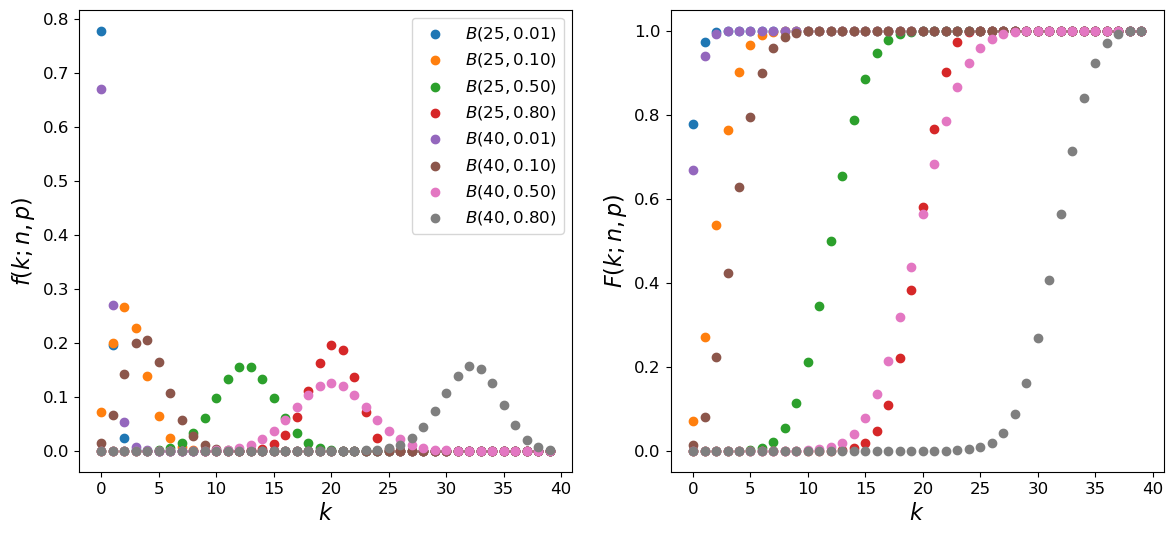

In [2]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

k = np.arange(0,40)

ns = [25, 40]
ps = [0.01,0.1,0.5,0.8]

fig, axs = plt.subplots(1,2,figsize = (14,6))
[[axs[0].scatter(k,binom.pmf(k,n,p),label='$B({:.0f},{:.2f})$'.format(n,p)) for p in ps] for n in ns]
[[axs[1].scatter(k,binom.cdf(k,n,p),label='$B({:.0f},{:.2f})$'.format(n,p)) for p in ps] for n in ns]

axs[0].set_xlabel('$k$',fontsize = 16)
axs[1].set_xlabel('$k$',fontsize = 16)
axs[0].set_ylabel('$f(k;n,p)$',fontsize = 16)
axs[1].set_ylabel('$F(k;n,p)$',fontsize = 16)

axs[0].tick_params(labelsize = 12)
axs[1].tick_params(labelsize = 12)

axs[0].legend(loc='upper right',fontsize = 12)

## Poisson distribution

You have likely seen the Poisson distribution before; this is a discrete probability distribution for modelling events that occur at some expected mean rate. This distribution is valid for:

* Events that occur in a fixed interval of time or space
* Events are independent of the time since the previous event

Probability for a given number of events $k$, with a mean rate $\lambda$, is given by

\begin{equation*}
f(k; \lambda) = \frac{\lambda^ke^{-\lambda}}{k!}
\end{equation*}

As before the CDF can be calculated by summing the probability distribution up to the evaluation value. 

The expectation and variance can be shown to both be equal to $\lambda$.

The Poisson distribution is implemented in `scipy.stats`, so it is easy to visualise the probability as a function of $k$ for a given $\lambda$, and the CDF:

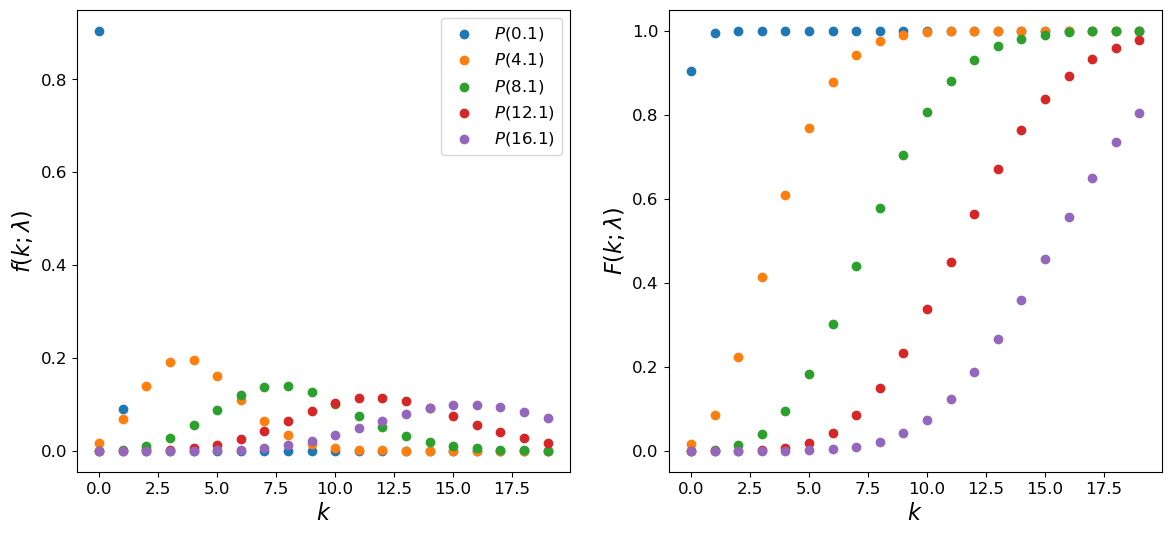

In [3]:
from scipy.stats import poisson

x = np.arange(0,20)
lambdas = np.arange(0.1,20,4.0)

fig, axs = plt.subplots(1,2,figsize = (14,6))
[axs[0].scatter(x,poisson.pmf(x,i),label='$P({:.1f})$'.format(i)) for i in lambdas]
[axs[1].scatter(x,poisson.cdf(x,i),label='$P({:.1f})$'.format(i)) for i in lambdas]

axs[0].set_xlabel('$k$',fontsize = 16)
axs[1].set_xlabel('$k$', fontsize = 16)
axs[0].set_ylabel('$f(k;\lambda)$',fontsize = 16)
axs[1].set_ylabel('$F(k;\lambda)$',fontsize = 16)
axs[0].tick_params(labelsize = 12)
axs[1].tick_params(labelsize = 12)

axs[0].legend(loc='upper right',fontsize = 12)

<div style="background-color:#FFCCCB">

### Poisson distribution as a limit of the Binomial distribution

Consider a binomial distribution with a large number of samples, but a very small probability of success. We can consider this limit as $n \to \infty$ and $p \to 0$. Assuming that these limits are taken such that the product $\lambda = np$ is constant, we can show that the binomial distribution in this limit converges to the Poisson distribution.

We can rewrite the binomial distribution using $p = \frac{\lambda}{n}$:

\begin{align*}
f(k; n, p) &= \frac{n!}{k!(n-k)!}\left(\frac{\lambda}{n}\right)^k\left(1 - \frac{\lambda}{n}\right)^{n-k} \\
&= \frac{\lambda^k}{k!}\frac{n!}{(n-k)!}\left(\frac{1}{n}\right)^k\left(1 - \frac{\lambda}{n}\right)^{n-k}
\end{align*}

We can look at a couple terms of this expression separately to determine how this behaves in the limit $n \to \infty$, starting with the middle term.

\begin{equation*}
\frac{n!}{(n-k_!)}\left(\frac{1}{n}\right)^k = \frac{n(n-1)(n-2)\cdots(n - k + 1)(n -k)(n-k - 1)\cdots}{n^k(n-k)(n-k-1)\cdots}
\end{equation*}

Terms from (n-k) and downwards to 1 can be cancelled between the numerator and denominator, resulting in

\begin{equation*}
\frac{n!}{(n-k_!)}\left(\frac{1}{n}\right)^k = \frac{n}{n^k}(n-1)(n-2)\cdots(n-k+1)
\end{equation*}

We can take a factor of n out of each of the $k - 1$ bracketed terms on the right hand side, leading to
\begin{equation*}
\frac{n!}{(n-k_!)}\left(\frac{1}{n}\right)^k = \frac{n^k}{n^k}\left(1-\frac{1}{n}\right)\left(1-\frac{2}{n}\right)\cdots\left(1-\frac{k+1}{n}\right)
\end{equation*}

In the limit $n \to \infty$, each time like $\frac{1}{n}$, $\frac{2}{n}$ etc will tend to 0, thus this whole term tends to 1 as we take the limit $n \to \infty$ and $p \to 0$.

Now considering the last term in our original expression:

\begin{equation*}
\left(1 - \frac{\lambda}{n}\right)^{n-k} = \left(1 - \frac{\lambda}{n}\right)^n\left(1-\frac{\lambda}{n}\right)^{-k}
\end{equation*}

As $n\to\infty$ and $p\to 0$, $\lambda$ is constant. As a result, the second term tends to 1. The first term is more interesting, and in fact looks a lot like the usual expression for the exponential function,

\begin{equation*}
e^x = \lim_{n\to\infty}\left(1 + \frac{x}{n}\right)^n,
\end{equation*}

so we find that:

\begin{equation*}
\lim_{n\to\infty,\,p\to0}\left(1 - \frac{\lambda}{n}\right)^{n-k} = e^{-\lambda} = e^{-np}
\end{equation*}

We can therefore put everything together to show that

\begin{equation*}
\lim_{n\to\infty,\,p\to0}f(k; n, p) = \frac{(np)^k}{k!}e^{-np} = \frac{\lambda^k}{k!}e^{-\lambda} = f(k; \lambda),
\end{equation*}
where this is the Poisson distribution.

## Normal distribution



The normal distribution, or Gaussian distribution, is a distribution you will be familiar with and very useful in general. In fact, a theorem known as the **central limit theorem** states that for any ensemble of $N$ random variables, the total distribution tends to a normal distribution.

For a continuous random variable $X$ distributed according to a Normal distribution $N(\mu,\sigma)$, the probability density function is given as

\begin{equation*}
f(X; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{X - \mu}{\sigma}\right)^2}
\end{equation*}

Again `scipy.stats` defines the PDF and CDF for a normal distribution, that you can access easily:

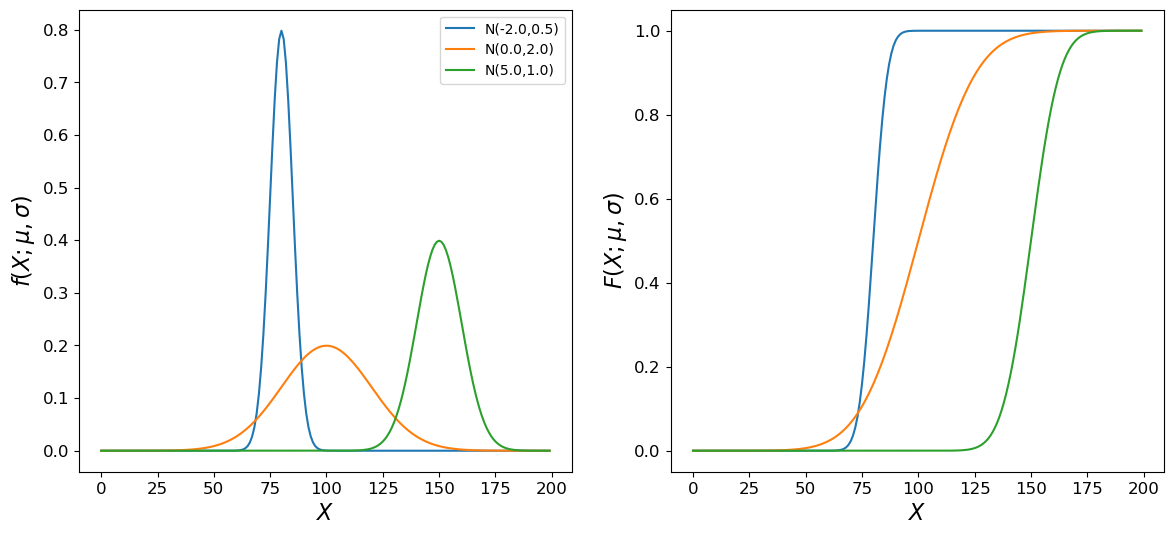

In [47]:
from scipy.stats import norm

x = np.arange(-10,10,0.1)
mu_range = [-2,0,5]
sig_range = [0.5,2,1]

fig, axs = plt.subplots(1,2,figsize = (14,6))
[axs[0].plot(norm.pdf(x,m,s),label = 'N({:.1f},{:.1f})'.format(m,s)) for m, s in zip(mu_range,sig_range)]
[axs[1].plot(norm.cdf(x,m,s),label = '$\mu$ = {:.1f}, $\sigma$ = {:.1f}'.format(m,s)) for m, s in zip(mu_range,sig_range)]

axs[0].set_xlabel('$X$',fontsize = 16)
axs[0].set_ylabel('$f(X;\mu,\sigma)$',fontsize = 16)
axs[1].set_xlabel('$X$',fontsize = 16)
axs[1].set_ylabel('$F(X;\mu,\sigma)$',fontsize = 16)
axs[0].tick_params(labelsize = 12)
axs[1].tick_params(labelsize = 12)

axs[0].legend(loc='upper right')

A normal distribution with $\mu$ = 0 and $\sigma$ = 1 is referred to as a **standard normal distribution**. 

<div style="background-color:#FFCCCB">

## Central limit theorem

You will have heard of the central limit theorem before, but we can and will prove it here. This theorem states that for a set of independent and identically distributed random variables (i.e. different samples of the same probability distribution), the distribution of the standardised sample mean tends towards the standard normal distribution, regardless of the distribution of the original variables. 

In practice, this means if we make many measurements of the same quantity, the mean and variance of those measurements will tend towards a normal distribution as we increase the number of measurements. 

To prove this, we will require **characteristic functions**. Any probability distribution has a characteristic function that completely defines it - if we know $\varphi_X(t)$, we know $f(X)$ too. This function is defined as:

\begin{equation*}
\varphi_X(t) = \int_{-\infty}^\infty e^{itX}f(X)dX
\end{equation*}

This is equivalent to taking the Fourier transform of the probability density function. All properties of Fourier transforms can therefore be applied to characteristic functions. In particular, the one we will make use of for proving the central limit theorem is the sum-product relation: the characteristic function of the sum of independent variables is the product of the individual characteristic functions, i.e.

\begin{equation*}
\varphi_{X_1 + \cdots + X_n}(t) = \prod_{i = 1}^n\varphi_{X_i}(t)
\end{equation*}

### Central limit theorem for independent and identically distributed random variables


* Consider a set of $n$ independent random variables $X_i$, each with mean $\mu$ and variance $\sigma^2$
* The sum of these random variables $X_1 + \cdots + X_n$ has a mean $n\mu$ and variance $n\sigma^2$ (as variables are independent)
* Define the standardised sum of these random variables:

\begin{equation*}
Z_n = \frac{X_1 + \cdots +X_n - n\mu}{\sqrt{n\sigma^2}} = \sum_{i = 1}^n\frac{X_i - \mu}{\sqrt{n\sigma^2}}
\end{equation*}

* Define standardised random variables $Y_i = \frac{X_i - \mu}{\sigma}$ with mean = 0 and variance = 1, such that

\begin{equation*}
Z_n = \sum_{i = 1}^n\frac{1}{\sqrt{n}}Y_i
\end{equation*}

* Using the definition of the characteristic function, the characteristic function $\varphi_{Z_n}$ is given by

\begin{equation*}
\varphi_{Z_n}(t) = \varphi_{Y_1}\left(\frac{t}{\sqrt{n}}\right)\varphi_{Y_2}\left(\frac{t}{\sqrt{n}}\right)\cdots\varphi_{Y_n}\left(\frac{t}{\sqrt{n}}\right)
\end{equation*}

* Because the Y_i are identically distributed, this is equal to

\begin{equation*}
\varphi_{Z_n}(t) = \left[\varphi_{Y_1}\left(\frac{t}{\sqrt{n}}\right)\right]^n
\end{equation*}

* As $n \to \infty$, the argument of $\varphi_{Y_1}$ becomes small, so we can apply a Taylor expansion:

\begin{equation*}
\varphi_{Y_1}\left(\frac{t}{\sqrt{n}}\right) = E\left[e^{i\frac{t}{\sqrt{n}}Y_i}\right] = E\left[\sum_{r = 0}^\infty\frac{\left(i\frac{t}{\sqrt{n}}Y_1\right)^r}{r!}\right] = \sum_{r = 0}^\infty\frac{\left(i\frac{t}{\sqrt{n}}\right)^r}{r!}E[Y_i^r]
\end{equation*}

Because we have standardised $Y_i$, $E[Y_1]$ = 0 and the variance $V(Y_1) = E[Y^2] - E[Y]^2 = E[Y^2]$ = 1, the first three terms of the Taylor expansion evaluate to give

\begin{equation*}
\varphi_{y_1}\left(\frac{t}{\sqrt{N}}\right) = 1 - \frac{t^2}{2n} + \mathcal{O}\left(\frac{t^3}{N^\frac{3}{2}}\right)
\end{equation*}

We can substitute this back into the expression for $\varphi_{Z_n}$ to find that

\begin{equation*}
\varphi_{Z_n}(t) = \left(1 - \frac{t^2}{2n}\right)^n
\end{equation*}

Again from our standard form of the exponential, in the limit of $n\to\infty$ we can see that

\begin{equation*}
\varphi_{Z_n}(t) = e^{-\frac{1}{2}t},
\end{equation*}
which is the characteristic function for a normal distribution with $\mu$ = 0 and $\sigma$ = 1. As a result, by a theorem known as Lévy's convergence theorem, we can say that in the limit of $n\to\infty$ the random variable $Z_n$ is distributed according to a standard normal distribution, $Z\sim N(0,1)$. This is regardless of the specifics of the distribution the random variables $X_i$ are distributed according to.

### Practical implications

For the binomial and Poisson distributions, it can be shown that the sum of outcomes of a binomial is distributed according to another binomial distribution, and the sum of Poissons is distributed according to another Poisson distribution. 

To demonstrate this, consider a binomially distributed variable. Taking $N$ trials, then taking another $N$ trials, is the same as just taking $2N$ trials to begin with. For a Poisson distribution, consider Poisson random variable with expectation $\lambda$. If $N$ measurements are made, the total average number expected over these $N$ trials is $N\lambda$. This is equivalent to making a single measurement of a Poisson random variable with expectation $N\lambda$. 

At what scale is it appropriate to approximate a binomial or Poisson distribution with a normal distribution? It depends on the parameters of the distributions; for binomial distributions, we need to make the number of trials $n$ sufficiently large, whereas for the Poisson distribution we need sufficiently large $\mu$. Typically, a value of $\mu$ around 100 gives a reasonable Gaussian approximation to the Poisson distribution, whereas for a binomial the necessary value of $n$ depends on the probability $p$ and generally requires $1\ll Np \ll N$.


### $\chi^2$ distribution



Mostly commonly used in goodness-of-fit testing, the $\chi^2$ distribution is a very important distribution that is related to the normal distribution. In fact, the square of a standard normally distributed random variable is distributed according to the $\chi^2$ distribution, with 1 **degree of freedom**. 

A random variable $X$ distributed according to a a $\chi^2$ distribution with one degree of freedom can be denoted as $X \sim \chi^2(1)$. The PDF of this distribution can then be written as

\begin{equation*}
f(X; 1) = \frac{1}{\sqrt{2\pi X}}e^{-\frac{X}{2}}
\end{equation*}

In general, for $N$ independent, standard normal variables {$Z_1$, $\cdots$, $Z_N$}:

* Define sum of squares $Q = \sum_{i = 1}^N Z_i^2$
* Q is distributed according to a $\chi^2$ distribution with $N$ degrees of freedom, $Q \sim \chi^2(N)$

Once again `scipy.stats` has a good implementation of the $\chi^2$ distribution, for any number of degrees of freedom.

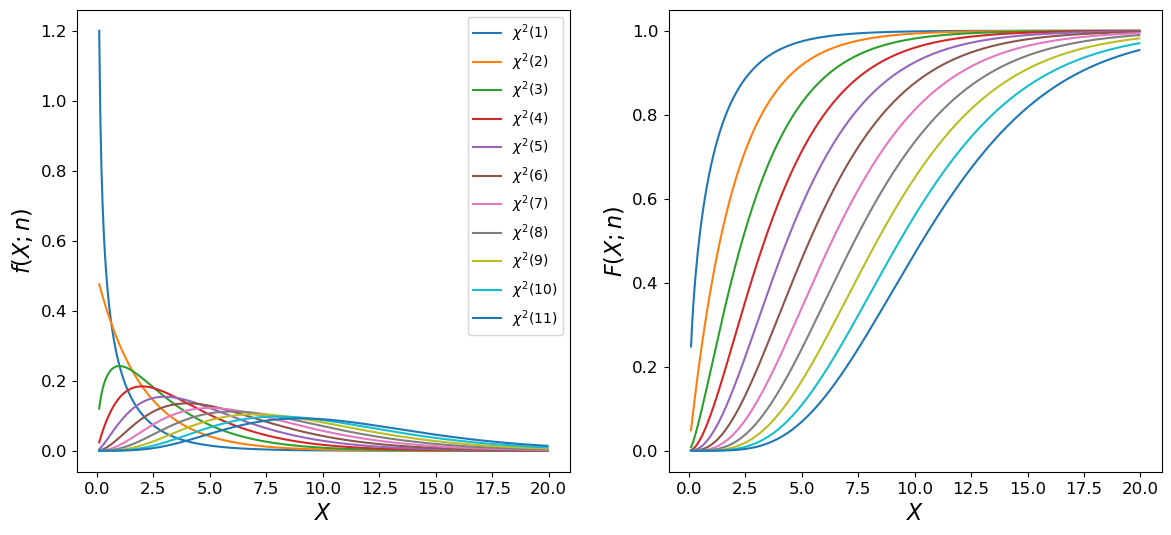

In [5]:
from scipy.stats import chi2

x = np.arange(0.1,20,0.05)
ndof = range(1,12,1)

# plotting
fig, axs = plt.subplots(1,2,figsize=(14,6))

[ axs[0].plot(x,chi2.pdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]
[ axs[1].plot(x,chi2.cdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]

axs[0].set_xlabel("$X$",fontsize = 16)
axs[0].set_ylabel("$f(X;n)$",fontsize = 16)
axs[1].set_xlabel("$X$",fontsize = 16)
axs[1].set_ylabel("$F(X;n)$",fontsize = 16)
axs[0].tick_params(labelsize = 12)
axs[1].tick_params(labelsize = 12)

axs[0].legend()


You will see next week how this distribution relates to the $\chi^2$ test for goodness of fit.

<hr style="border:2px solid gray">

# Section Three: Monte Carlo methods of data generation



Often you will need to simulate data distributions from experiments or theories to then compare with real data. This is called the **Monte Carlo Technique** and is a form of integration. This is often used for functions that are difficult to integrate or invert. However, we will begin with the method for simple situations.


## Inverse transform [^](#index) <a id='inverse'></a>

The mathematics given below shows that fundamental ideas behind generating the required random distribution, however the exact method is only applicable for integrable, invertable functions.

In order to generate a random distribution $X$ such that it has a given PDF $f(X)$ in the range $-\infty \le X \le \infty$, the following steps are needed:
1. Calculate the cumulative distribution $F(X) = \int_{-\infty}^\infty f(X) dX$
1. For properly normalised PDF (and CDF), generate numbers $u$ sampled from the uniform distribution $U(0,1)$ i.e. with a uniform pdf between 0 and 1
1. Find the smallest value of $X$ such that $F(X) \geq u$ for all values of $u$ generated

In order to complete step 3, we must find the **inverse function** of the CDF, which inverts the operation of the CDF. We can write this as

\begin{align*}
F(X) &= u\\
F^{-1}(u) &= X
\end{align*}
where $F^{-1}(u)$ is the inverse function of the CDF. 

Once we have determined the inverse function, we can apply it to our randomly generated values of $u$ (generated according to a uniform distribution between 0 and 1) to calculate the corresponding values of X. By repeatedly sampling U(0,1) and applying the inverse function to the sample, we generate data distributed according to our original PDF. 

To illustrate this, we will go through a concrete example using the PDF given as an example earlier: $f(X) = X^2$ for $-5\leq X \leq 5$. The PDF and CDF are given as

\begin{align*}
f(X) &= \frac{3}{2\cdot5^3}X^2, \quad &-5 \leq X \leq 5 \\
F(X) &= \frac{x^3}{2\cdot5^3} + \frac{1}{2}, \quad &-5 \leq X \leq 5,
\end{align*}
and can be seen in the plot below.

<img src='Week2_plots/pdf_cdf_example.png' align='center' width = 1200>

*PDF and CDF for the previously described distribution.*





This CDF is analytically invertible; we simply need to rearrange $F(X) = u$ to find a function in terms of $u$ to generate samples. We can find that the inverse fun ction is therefore given by

\begin{equation*}
F^{-1}(u) = \sqrt[3]{2\cdot5^3\left(u - \frac{1}{2}\right)}
\end{equation*}

We can use `numpy.random` to generate uniform data, and then apply this function to that uniformly distributed data to produce our distribution. The code cell below generates 100,000 draws from the uniform distribution U(0,1) and applies the inverse function to generate the desired distribution. 

Text(0, 0.5, 'Frequency')

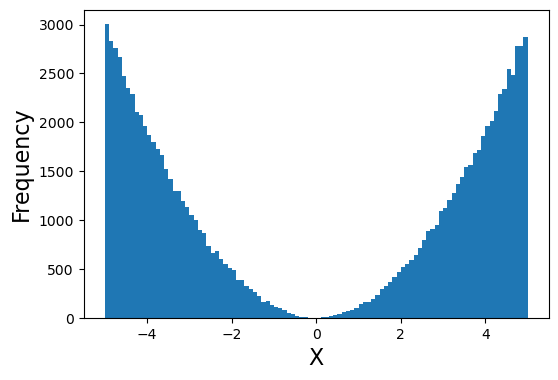

In [9]:
def inv(u):
    return np.cbrt(2*5**3*(u - 0.5))


samples = np.random.default_rng().uniform(0,1,size = 100000)

draws = inv(samples)
bins = np.linspace(-5,5,101)

fig, ax = plt.subplots(1,1,figsize = (6,4))
vals, bins, patches = ax.hist(draws,bins = bins)
ax.set_xlabel('X',fontsize = 16)
ax.set_ylabel('Frequency',fontsize = 16)

As you can see, this is a fairly reasonable approximation of the PDF $f(X) = \frac{3}{2\cdot5^3}X^2$.

This method can only be used for functions that are analytically integrable and invertible. When we cannot do these analytically, we have to do it numerically.

For a PDF that is not normalised, you must also calculate the limits on $u$. For example, for $f(X) = X^2$ with $-5 \leq X \leq 5$, we define 

\begin{equation*}
u = F(X) = \frac{x^3}{3} + \frac{5^3}{3}
\end{equation*}

We can then substitute in the limits of $X$ to find the limits of $u$; substituting in $X = -5$ and $X = 5$ gives us limits of $u = 0$ and $u = \frac{2\cdot5^3}{3}$. We can then generate values $u$ from the distribution $U(0,\frac{2\cdot5^3}{3})$ to sample our desired distribution.

<div style="background-color:#C2F5DD">


### Exercise 1

By inverting the function analytically, generate a distribution with the PDF $f(X) = e^X$ for $-2 \leq X \leq 2$. Remember the following steps:

* Calculate the inverse cumulative function
* Generate randomly sampled data $u$
* Apply inverse function to samples $u$
* Histogram generated samples

In [ ]:
# Define inverse function



In [ ]:
# Generate randomly sampled data



In [ ]:
# Apply inverse function to randomly sampled data



In [ ]:
# Plot histogram of generated samples



## Numerical Inverse Transform [^](#index) <a id='numerical'></a>


The function that you have may be difficult to either integrate or invert. Some functions, like the Gaussian distribution, are only integrable numerically, or you may have data sampled only at certain points. We can instead:

* Generate samples from the known PDF (if PDF is analytic), or use our sampled data
* Find the cumulative sum of these samples & normalise it to approximate the CDF
* Invert the numerical CDF F(X_i) by interpolating with F(X_i) as the "X" value and X_i as the "Y" value. This gives the inverse function
* Generate samples from the uniform distribution U(0,1) and apply the interpolated inverse function to them to generate samples

We will use an example from nuclear physics to demonstrate this. 

* The energy spectrum of fission neutron sources is an experimentally measured quantity, with standards published in reference documents 
* There are distributions designed to fit these spectra (e.g. the Watt distribution) but they have been determined empirically rather than from theory

You have been provided with a file called "cf_spectra.npy", which contains measured neutron rates from a $^{252}\text{Cf}$ source in different energy bins as published in ISO standards (internationally agreed standard values). These rates are measured from a given source so are currently not normalised, and are dependent on the size of the energy bin. 

The energy bins range across 10 orders of magnitude, from $10^{-8}$ to $10^2$ MeV. To visualise this properly, we will need to plot on a log scale. A plot of the PDF can be seen below.





<img src='Week2_plots/cf_spectrum.png' align='center' width=600>

*$^{252}\textit{Cf}$ neutron energy spectrum. This is an unnormalised PDF.*

The data file "cf_spectra.npy" contains X values, which are the centers of the energy bins used for measurement, and y values, which are the rate measured in each energy bin. The code below illustrates how we can use this data to generate energy samples from this distribution. Here we will use a type of interpolation called a cubic spline; you will see some details of this in Week 4. 

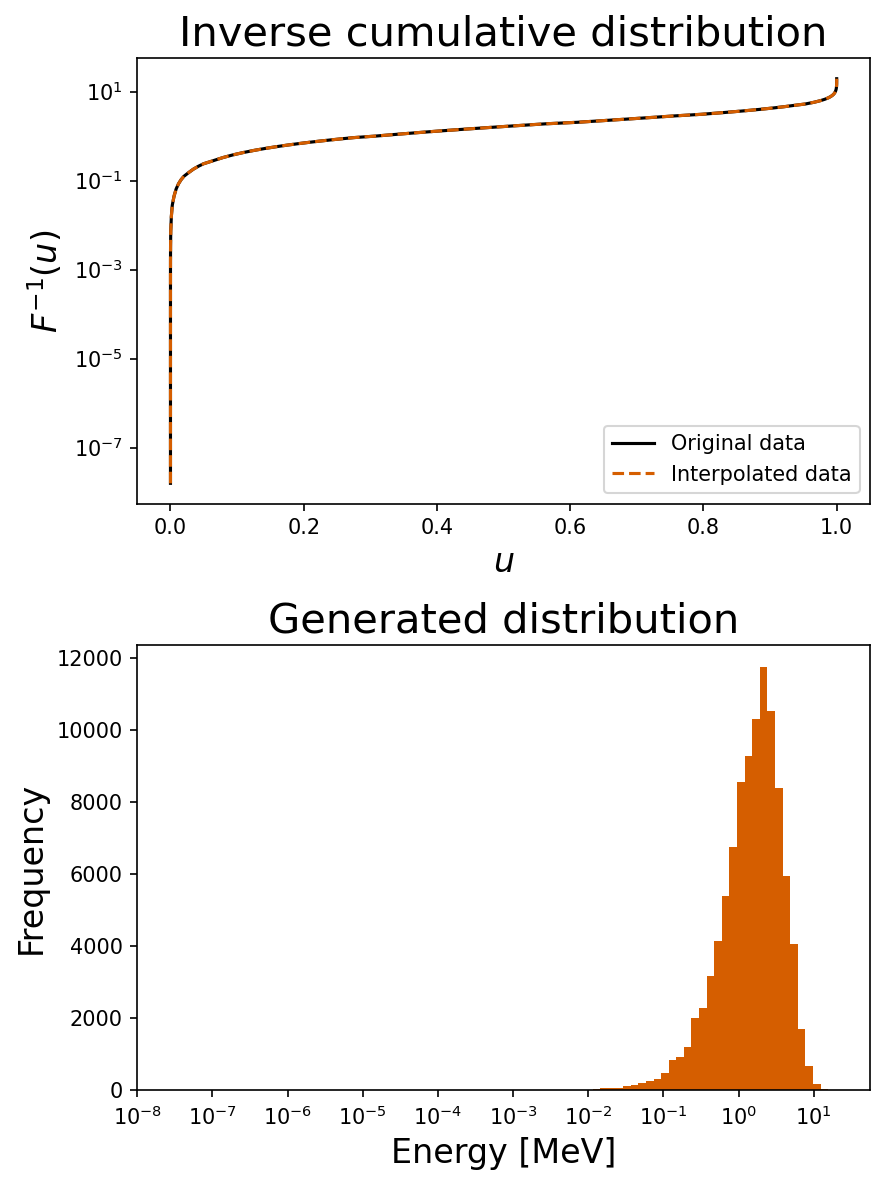

In [33]:
from scipy.interpolate import CubicSpline
from matplotlib.ticker import LogLocator

# Load the data; need to unpickle the dictionary
cf_iso = np.load('cf_spectra.npy',allow_pickle = True).item() 

X = cf_iso['X']
y = cf_iso['y']

# Define and normalise the cumulative distribution

ysum = y.cumsum()
ysum = ysum/ysum[-1] # because we want the last value of the cumulative distribution to equal 1

# Interpolate the inverted function

inv = CubicSpline(ysum, X) # Note the ordering of arguments; the CDF would be ordered (X, ysum), but to get the inverse function we order it as (ysum, X)

# Check the quality of the spline

fig, (ax0,ax1) = plt.subplots(2,1,figsize = (6,8),dpi = 150)
ax0.plot(ysum,X,label='Original data',color='black')
ax0.plot(ysum,inv(ysum),label='Interpolated data',ls='--',color='#D55E00')
ax0.legend(loc='lower right')
ax0.set_xlabel('$u$',fontsize = 16)
ax0.set_ylabel('$F^{-1}(u)$',fontsize =16)
ax0.set_yscale('log')
ax0.set_title('Inverse cumulative distribution',fontsize = 20)

# Generate uniform samples and apply the inverse function to them to produce the distribution

u = np.random.default_rng().uniform(0,1,size = 100000)

samples = inv(u)

# Plot histogram of generated distribution; manually specify bins using np.logspace

bins = np.logspace(-8,2,100)

ax1.hist(samples, bins = bins,color='#D55E00')
ax1.set_xlabel('Energy [MeV]',fontsize = 16)
ax1.set_ylabel('Frequency',fontsize = 16)
ax1.set_xscale('log')
ax1.set_title('Generated distribution',fontsize = 20)
ax1.set_xlim(1e-8,56)
ax1.xaxis.set_major_locator(LogLocator(base = 10.0,numticks = 14))

fig.tight_layout()


In general this can also be used with functions that cannot be integrated analytically, such as Gaussians. 

<div style="background-color:#C2F5DD">

### Exercise 2

Using the numerical inversion method, generate samples from the standard normal distribution (a Gaussian with $\mu$ = 0 and $\sigma$ = 1).

Try plotting three different sets of generations, with different number of points generated, to see how the distribution builds up.

In [34]:
# Define a standard normal distribution and calculate some numerical data

def standard_normal(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

x = np.linspace(-5,5,0.011)
y = standard_normal(x)

In [ ]:
# Calculate cumulative distribution from y data; remember to normalise



In [ ]:
# Interpolate to find the inverse function; remember first argument should be cumulative distribution, then X



In [ ]:
# Generate samples from uniform distribution in range [0,1]



In [ ]:
# Apply inverse function to samples and plot histogram



<div style="background-color:#C2F5DD">

Here we have used a normalised standard normal distribution; do we need to normalise a distribution to use for generating Monte Carlo data? Put your answer in the Markdown cell below.

Your answer here


# The Accept-Reject Method [^](#index) <a id='accept-reject'></a>

If the PDF $f(x)$ is too complicated even to invert numerically, then we can always use the accept/reject method. In particular, this is most useful for functions with discontinuities.  This is done according to the following steps:

1. Generate a random number $X$ from a uniform distribution over the range of the desired PDF
1. Generate a second random number $y$ from the uniform distribution $h(y)$ = $U(0,a)$ where $a$ is the maximum value of the 
1. If $y \leq f(X)$, then the point is kept; otherwise it is rejected

This method only accepts points that lie beneath the desired PDF; because regions of the PDF with higher probability have more "vertical" space available, the density of points accepted in these regions is increased compared to regions of low probability. 

For example, consider a density function defined as $f(X) = -X^2 + 4$ for the range $-2 \leq X \leq 2$. The code cell below shows how we can use the accept-reject method on this function.

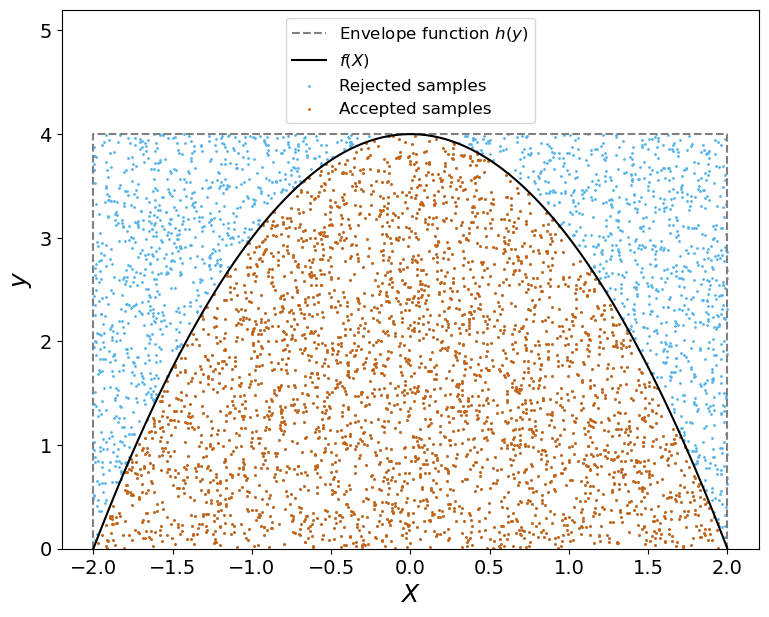

In [50]:

# Define the function
def f(x):
    return -x**2 + 4


# Generate uniform X samples in the region of interest
x_samples = np.random.uniform(-2,2,size = 5000)

# Generate uniform y samples in U(0, max(f(X)) (where the max(f(X) here is at f(0))
y_samples = np.random.uniform(0,f(0),size = 5000)

# Find which samples fulfill the critera y <= f(X); the condition used here is requiring that f(X) is not < y
# The ~ operator is the bitwise NOT operator; inverts the boolean condition
keep = ~(f(x_samples)<y_samples)

# Plot the PDF, envelope function, and some samples
fig, ax = plt.subplots(1,1,figsize = (9,7))
ax.plot([-2,-2,2,2],[0,f(0),f(0),0],ls='--',color='grey',label='Envelope function $h(y)$')
ax.plot(np.linspace(-2,2,100),f(np.linspace(-2,2,100)),label='$f(X)$',color='black')
ax.set_xlim(-2.2,2.2)
ax.set_ylim(0,1.3*f(0))
ax.set_xlabel('$X$',fontsize = 18)
ax.set_ylabel('$y$',fontsize = 18)
ax.tick_params(labelsize = 14,which='both')
ax.scatter(x_samples, y_samples, s = 1, label='Rejected samples', color='#56B4E9')
ax.scatter(x_samples[keep],y_samples[keep],s = 1,c='#D55E00',label = 'Accepted samples')
ax.legend(loc='upper center',fontsize = 12)


We can clearly see that only the samples beneath the desired PDF $f(X)$ are accepted, while all other samples are rejected. We can then plot a histogram of these values to verify we have successfully generated data according to our PDF:

Text(0.5, 1.0, 'Generated distribution')

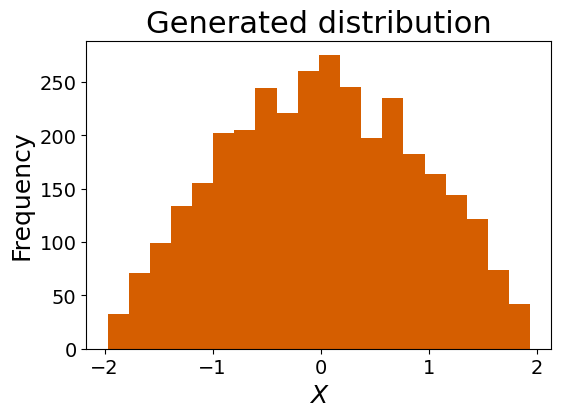

In [54]:
fig, ax = plt.subplots(1,1,figsize = (6,4))
ax.hist(x_samples[keep], bins = 20,color='#D55E00')
ax.set_xlabel('$X$',fontsize = 18)
ax.set_ylabel('Frequency',fontsize = 18)
ax.tick_params(labelsize = 14,which='both')
ax.set_title('Generated distribution',fontsize = 22)

In general, this approach is not efficient, as you generate far more data than is necessarily useful, depending on the shape of the function; here we can quickly check what fraction of the data is accepted, to get an idea of how many data points we need to generate to get e.g. 100,000 data points generated according to our distribution.

In [45]:
number_kept = keep.sum() # can sum boolean values to get number of True
number_generated = len(x_samples)

fraction_accepted = number_kept/number_generated
print(fraction_accepted)

0.6786


So we have accepted about 67.9% of generated data points. This means we need to generate about 30% more data than we want, for this function; so for 100,000 data points generated according to the distribution, we must generate 130,000 data points in total. This value will depend greatly on the specifics of the PDF in question.

<div style="background-color:#C2F5DD">

### Exercise 3

Using the accept-reject method, generate a distribution with 100,000 entries for $f(X) = e^{-X^2/2}$ for $-3 \leq X \leq 3$. Remember the following steps:

* Generate random uniform samples in the range for desired PDF
* Generate random uniform samples from distribution $h(y) = U(0, a)$ where a is the maximum value of the desired PDF in the interval
* Find samples for which $y \leq f(X)$
* Plot histogram of the accepted samples

In [ ]:
# Generate uniform samples in PDF range



In [ ]:
# Generate uniform samples from h(y)



In [ ]:
# Find accepted samples



In [ ]:
# Plot histogram


Of course, python has a lot of functions for generating data from some default distributions for you. Common choices include `numpy.random`, which has generators for many common distributions, or `scipy.stats`, which implements probability distributions that you can visualise (as we have done earlier) with many common methods between different distributions for producing e.g. the PDF, generating random samples, calculating the first four moments of the distribution (mean, variance, skew and kurtosis), etc.

## Summary



<hr style="border:2px solid gray">

## Section Four: Exercises

<div style="background-color:#C2F5DD">

### Exercise Four

Generate a distribution of 1 million entries with a pdf of $\sin(x)$ between 0 and $\pi$. Do this by:

1. Inverting the analytic integral
1. Integrating numerically
1. Using the accept-reject method

Jupyter Notebooks let you time how long a cell runs by putting `%%timeit` at the start of a cell. Use this to time each method you use. Which one is fastest?

In [46]:
# Analytic inverse

%%timeit

# Calculate and define the inverted analytic integral

def inv(x):
    return #your code here


# Generate uniform samples

u = 

# Apply inverted function to uniform samples

samples = 

# Plot histogram of samples



In [ ]:
# Numerical inverse

%%timeit 

# Define X points for numerical evaluation

X_range = 

# Calculate f(X) for each point

y = 

# Calculate and normalise cumulative distribution

ysum = 

# Interpolate to find inverse function

inv = 

# Generate uniform samples

u = 


# Apply interpolated inverse function to uniform samples

samples = 


# Plot histogram of samples




In [ ]:
# Accept-reject method

%%timeit

# Generate uniform X samples in the region of interest

x_samples = 

# Generate uniform y samples in U(0, max(f(X)) (where the max(f(X) here is at f(0))

y_samples = 

# Find which samples fulfill the critera y <= f(X); the condition used here is requiring that f(X) is not < y

keep = 

# Find accepted samples

x_accepted = 


# Plot histogram of accepted samples



<div style="background-color:#C2F5DD">

### Exercise Five

You will have previously encountered the famous Monty Hall problem, to illustrate applications of Bayes theorem. The problem goes like:

* On a gameshow, there are three doors, behind one of which there is a prize
* You choose a door to start with
* The host opens a door, to show nothing behind it
* You then have the option to stick with your original choice, or to switch to the remaining door
* If you open the door with the prize behind it, you win the prize

We can use Bayes theorem to show that the probability of winning the prize is 1/3 if you stick with your original choice of door, while it is 2/3 if you swap doors. This may seem a bit counter-intuitive; to think about this, we will run a simulation of the game to see how the number of successes and losses converges as we make more measurements. 

The code cell below defines a function to "play" the Monty Hall game; you choose a strategy of either "stick" or "swap" with the initial (random) choice of door. THe doors are labelled A, B and C. 


In [3]:
prize_boxes = ['A','B','C']

def playmontyhall(strategy,ngames=1):
   games = []
   for n in range(ngames) :
    prize = np.random.choice(prize_boxes)

    # player chooses a box
    player_choice = np.random.choice(prize_boxes)

    # host opens a box from remaning boxes.
    remaining_choices = [c for c in prize_boxes if c not in [prize,player_choice]]
    host_choice = np.random.choice(remaining_choices)
    remaining_box = [c for c in prize_boxes if c not in [host_choice,player_choice]]

    # now player can swap or stick
    if strategy == "swap":
     original_choice = player_choice
     player_choice = remaining_box[0]
     if ngames <=1 : print("Player chose box %s originally, host opened box %s, player swapped to box %s"%(original_choice,host_choice,player_choice))
    else:
     if ngames <=1 : print("Player chose box %s, host opened box %s"%(player_choice,host_choice))
    if ngames <=1 :
      print(" .... prize was in box %s"%(prize))
      if player_choice==prize: print(" -----> WIN!")
      else: print(" -----> LOSE :(")

    if player_choice==prize: games.append("win")
    else : games.append("lose")
   return games

playmontyhall('stick')

Player chose box B, host opened box C
 .... prize was in box B
 -----> WIN!


['win']

<div style="background-color:#C2F5DD">

You can pass the ngames argument to run the simulation multiple times in one go. 

Using this code, running the simulation 10 times to find the number of successes and failures for each strategy. 

* What happens if you increase the number of times you run the simulation? 

If you divide the number of successes by the total number of tries you can find the probability of success for each strategy. As you increase the number of times you run the simulation, you should find this tends towards the Bayes theorem result. 

In [ ]:
# Define number of runs

ngames = 

# Run simulation



# Calculate probability of success for each strategy

p_success_stick = 


p_success_swap = 

<div style="background-color:#C2F5DD">

### Exercise Six

One useful tool to illustrate the Central Limit Thoerem is a construct called a Galton machine. Such a machine is constructed as follows:

* A board with offset rows of pegs, with collection bins at the bottom
* A marble is dropped into the top of the board at the center, and left to fall to the bottom
* At each peg the marble bounces either left or right by 1 position
* When the marble reaches the bottom of the board it lands in one of the bins and the position is recorded

The figure below illustrates such a machine.

<img src='Week2_plots/galton_image.png' align='center' width=600>

Much like with the Monty Hall problem, we can can simulate this action. At each peg, the ball as an equal probability of going left or right. The code cell below contains a function to simulate a single step in a Galton machine.

In [4]:
def galton_step(x):
    r = np.random.default_rng().uniform(0,1)
    if r<0.5:
        return x-1 # Move left
    else:
        return x+1 # Move right
    


<div style="background-color:#C2F5DD">

Using this function and the code cells below, experiment with changing the number of layers and the number of trials of the Galton machine. Plot a histogram of the normalised final position of the balls dropped through the Galton machine. 

You should find the result is distributed according to the standard normal distribution $N(0,1)$.

In [ ]:
n_layers = 10
n_trials = 10

finish = []
for i in range(n_trials):
    start = 0
    for j in range(n_layers):
        start = galton_step(start)
    start/=np.sqrt(n_layers) # Normalise distribution to have variance 1
    finish.append(start)

In [ ]:
# Your plotting code here
